

# ArviZ Stancon 2020
We're gonna talk about some real cool stuff. 

If you are reading the interactive slides from binder, press `space` to move to the next slide.

# ArviZ and Inference Data


## Agenda
* The many steps of Bayesian Workflow
* Where ArviZ fits in
* Where InferenceData fits in
* Where the community fits
* What doesn't quite fit in (yet)
* Where you fit in

# Bayesian Workflow
There's so many steps. PPLs only help out wUth a couple. ArviZ helps out with these ones. Lets add some colors and a legend so things are more obvious  
![Bayesian Workflow](img/Bayesian_workflow_Updated.png)



# All MCMC chains lead to plot_rank 
PPL choice may depend on syntax or sampler but chains, draws/samples, diagnostics, visualizations and modeling intent are largely the same

![PPLs](img/PPLS.png)

# So many arrays
* Prior Predictive
* Posterior
* Divergences
* Log probabilities for diagnostics
* All the above per parameter + different shapes in hierachical models

Dataframes with integrated indexing proved valuable for analysis. Bayesian data is high dimensional, but shares many of the challenges. 



5. We propose InferenceData Standard to share results (Show specification at high level here)


# Inference Data is one path
* Full specification https://arviz-devs.github.io/arviz/schema/schema.html
* Each NetCDF group is a 
![PyMC3](https://arviz-devs.github.io/arviz/_images/InferenceDataStructure.png)


# InferenceData sneak peek
* Read local netCDF files
* Generate `InferenceData` from a PyStan fit

Also integrated from Python with [CmdStanPy](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStanPy), [CmdStan](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStan) and from Julia with [CmdStan.jl](https://arviz-devs.github.io/ArviZ.jl/stable/quickstart.html#Plotting-with-CmdStan.jl-outputs-1)

## Read local netCDF files

In [1]:
import arviz as az

# Change this to NetCDF local load so its obvious
idata = az.load_arviz_data("radon")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

## Generate InferenceData from a PyStan fit


In [2]:
# Inference Data already compatible with Stan Interfaces (Thanks Ari, Allen and Mitzi!)
import pystan
from scipy import stats
y = stats.norm(10, 1).rvs(1000)
model = """
data {int N; real y[N];} parameters {real mu; real<lower=0> sigma;}
model { mu ~ normal(0, 1); sigma ~ cauchy(0, 1); y ~ normal(mu, sigma);}
"""
stan_model = pystan.StanModel(model_code=model)
fit = stan_model.sampling(data={"y":y, 'N':len(y)})

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7068b6fd3880b0f3a68d15c5c43d21aa NOW.


In [3]:
# should we add more here?
idata_pystan = az.from_pystan(
    posterior=fit,
    observed_data=["y"],
)
idata_pystan

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

# Organized data makes complex calculation easy

## Posterior exploration and diagnosis

<table style="color:#bbb">
  <tr>
    <th><span style="color:#000">posterior</span></th>
    <th><span style="color:#000">sample stats</span></th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

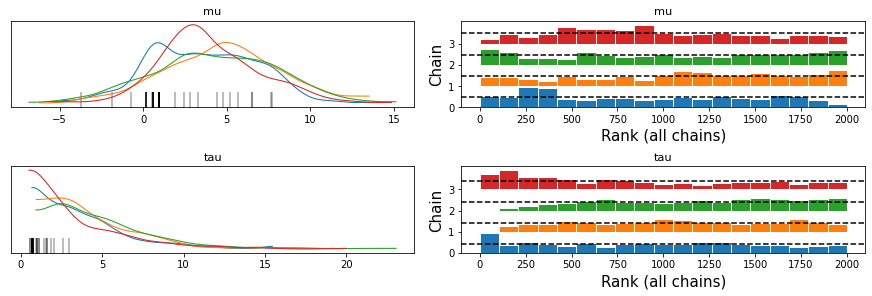

In [4]:
az.plot_trace(az.load_arviz_data("centered_eight"), var_names=["mu", "tau"], kind="rank_bars");

## Leave one out cross-validation (PSIS)

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

In [5]:
az.loo(idata)

Computed from 2000 by 919 log-likelihood matrix

         Estimate       SE
elpd_loo -1027.14    28.85
p_loo       26.78        -

The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.

## Prior predictive checks

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th><span style="color:#000">prior predictive</span></th>
  </tr>
</table>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd68b6940>],
      dtype=object)

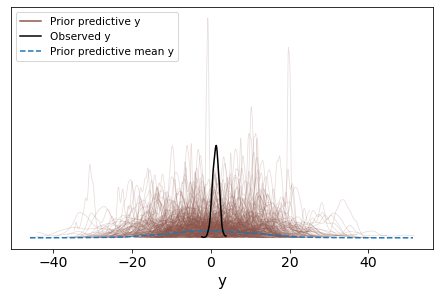

In [6]:
az.plot_ppc(idata, group="prior");

## Leave one out probability integral transform 

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th><span style="color:#000">posterior predictive</span></th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

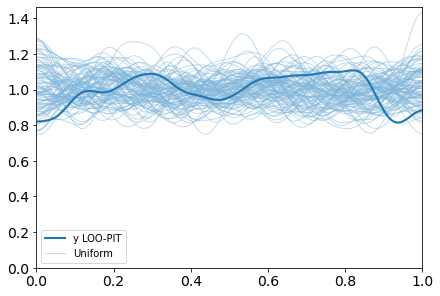

In [8]:
az.plot_loo_pit(idata, y="y");

# ArviZ and InferenceData benefits
* Consistent data representation across languages and PPls
* Portable and persistent NetCDF format
* Sharable datasets encourage reproducibility
* Allows PPL designers to focus on PPL and not out of sampler diagnostics and plots

# Inference Data Limitations
* InferenceData is MCMC specific
* Doesn't make full Bayesian workflow reproducible, just parts of it

# Add InferenceData support to your package
* InferenceData can just be format specification. 
* You don't need to use ArviZ or Python 

![](img/ArviZ.R.png)

# The core package could use help as well!
* Polish the `InferenceData` [schema](https://arviz-devs.github.io/arviz/schema/schema.html)
* Additional plots and diagnostics
* Code, feedback, publicly sharing models and cool plots you've made
* Improvements Support for sparse data structures

## More information
* https://arviz-devs.github.io/arviz/notebooks/XarrayforArviZ.html
* https://github.com/arviz-devs/arviz/blob/master/arviz/data/_datasets/centered_eight.nc
* https://arviz-devs.github.io/arviz/